### 세팅

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set_style('whitegrid')


In [14]:
data = pd.read_csv("../00_data/vgsales.csv")
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [10]:
drop_row_index = data[data['Genre'] > 2015].index
data = data.drop(drop_row_index)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          0 non-null      int64  
 1   Name          0 non-null      object 
 2   Platform      0 non-null      object 
 3   Year          0 non-null      float64
 4   Genre         0 non-null      object 
 5   Publisher     0 non-null      object 
 6   NA_Sales      0 non-null      float64
 7   EU_Sales      0 non-null      float64
 8   JP_Sales      0 non-null      float64
 9   Other_Sales   0 non-null      float64
 10  Global_Sales  0 non-null      float64
dtypes: float64(6), int64(1), object(4)
memory usage: 132.0+ bytes


In [16]:
data['Genre'].value_counts()

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

### 장르 별 매출(2000~2016)

C:\Users\1호실-24\AppData\Local\Temp\ipykernel_3068\4261682122.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='Global_Sales', data=genre_sales, palette=colors)


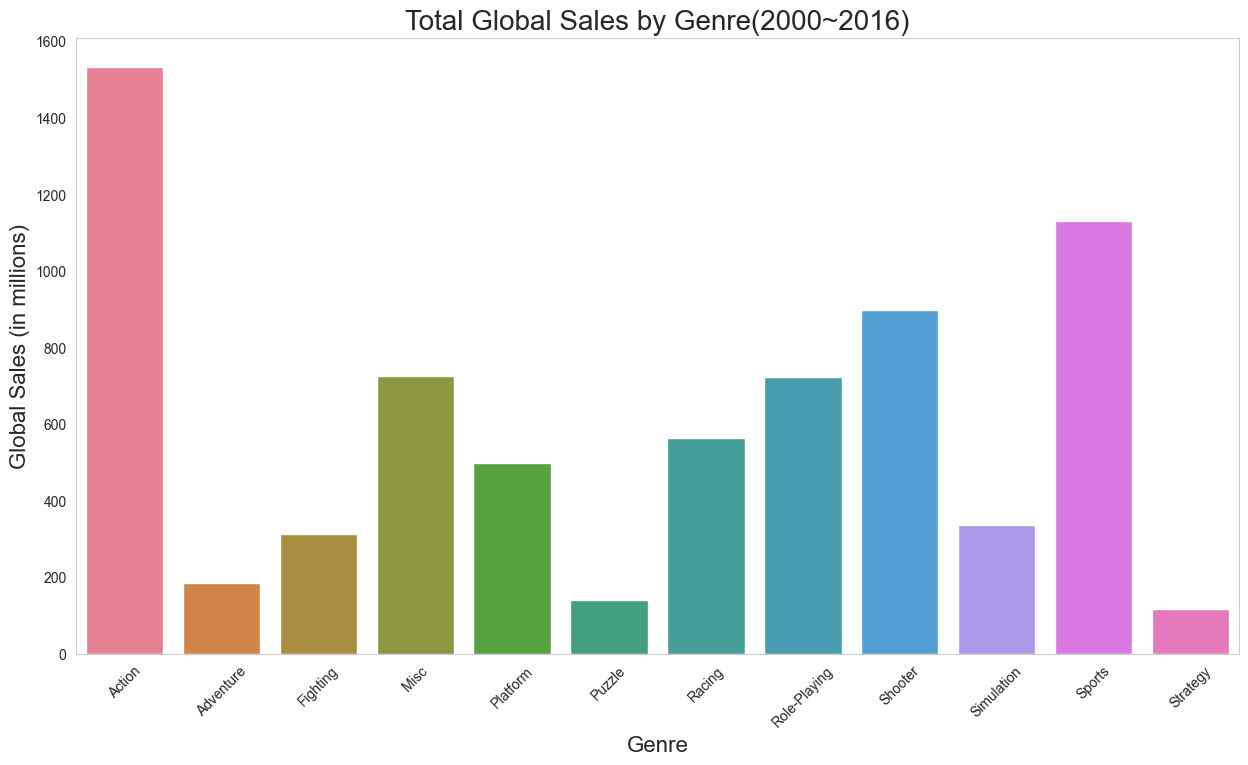

In [69]:
# 2000년부터 2016년까지의 데이터 필터링
data_filtered = data[(data['Year'] >= 2000) & (data['Year'] <= 2016)]

# 전체 데이터에서 장르별 Global Sales 합계 계산
genre_sales = data_filtered.groupby('Genre')['Global_Sales'].sum().reset_index()
plt.figure(figsize=(15, 8))

# 장르별로 색상을 지정하기 위한 고유 색상 리스트 생성
colors = sns.color_palette("husl", len(genre_sales)) 

sns.barplot(x='Genre', y='Global_Sales', data=genre_sales, palette=colors)

# 그래프 설정
plt.title('Total Global Sales by Genre(2000~2016)', fontsize=20)
plt.xlabel('Genre', fontsize=16)
plt.ylabel('Global Sales (in millions)', fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

### 연도별 장르에 따른 매출 변화(2000~2016)

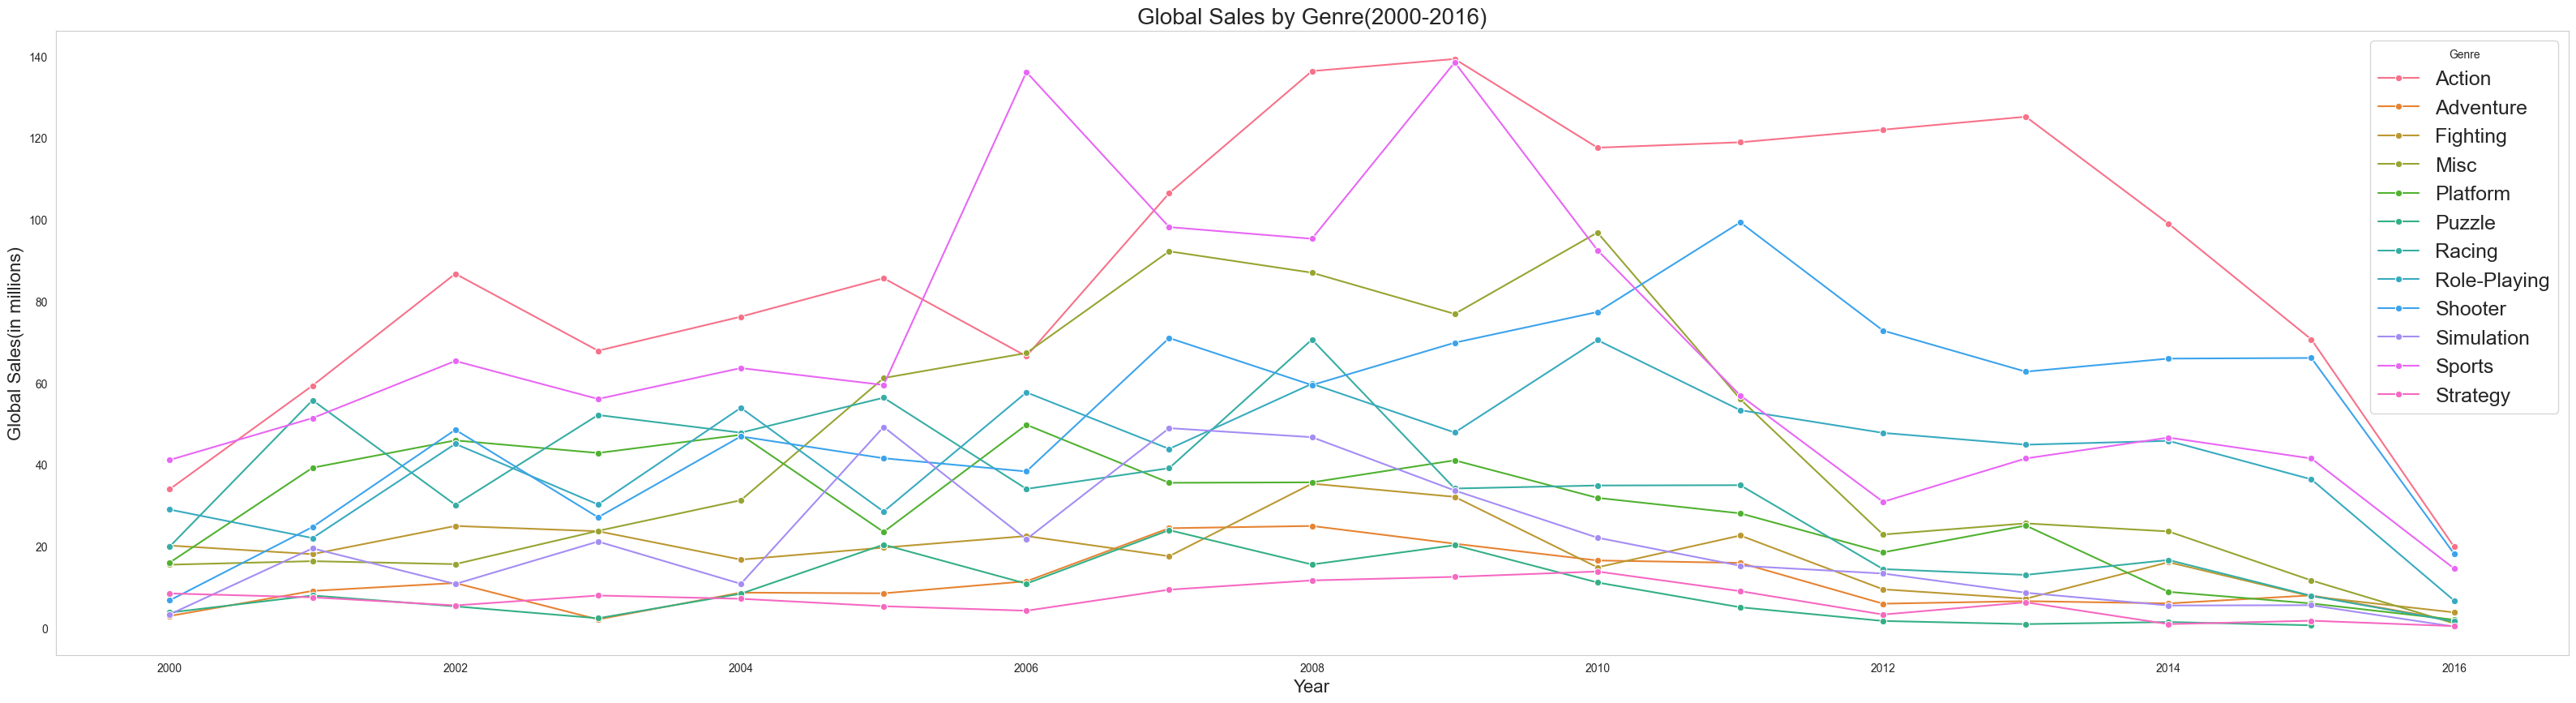

In [75]:
data_filtered = data[(data['Year']>= 2000)&(data['Year']<= 2016)]

genre_sales = data_filtered.groupby(['Year','Genre'])['Global_Sales'].sum().reset_index()

plt.figure(figsize=(40,10))

# 고유한 색상 리스트 생성 (장르 수에 맞게 색상을 설정)
unique_genres = genre_sales['Genre'].unique()
colors = sns.color_palette("husl", len(unique_genres)) 

# 각 장르에 대해 선 그래프 그리기
for i, genre in enumerate(unique_genres):
  genre_data = genre_sales[genre_sales['Genre']==genre]
  sns.lineplot(x='Year', y='Global_Sales',data=genre_data,label= genre,marker='o', color=colors[i])

  # 그래프 설정
  plt.title('Global Sales by Genre(2000-2016)',fontsize=20)
  plt.xlabel('Year',fontsize=16)
  plt.ylabel('Global Sales(in millions)',fontsize=16)
  plt.legend(title='Genre',fontsize=18)
  plt.grid(False)


### 연도에 따라 가장 많이 출시 된 장르 및 수량(2000~2016)

C:\Users\1호실-24\AppData\Local\Temp\ipykernel_3068\1954541327.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
C:\Users\1호실-24\AppData\Local\Temp\ipykernel_3068\1954541327.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x='Year', y='count', data=year_max_genre_filtered,palette=colors)


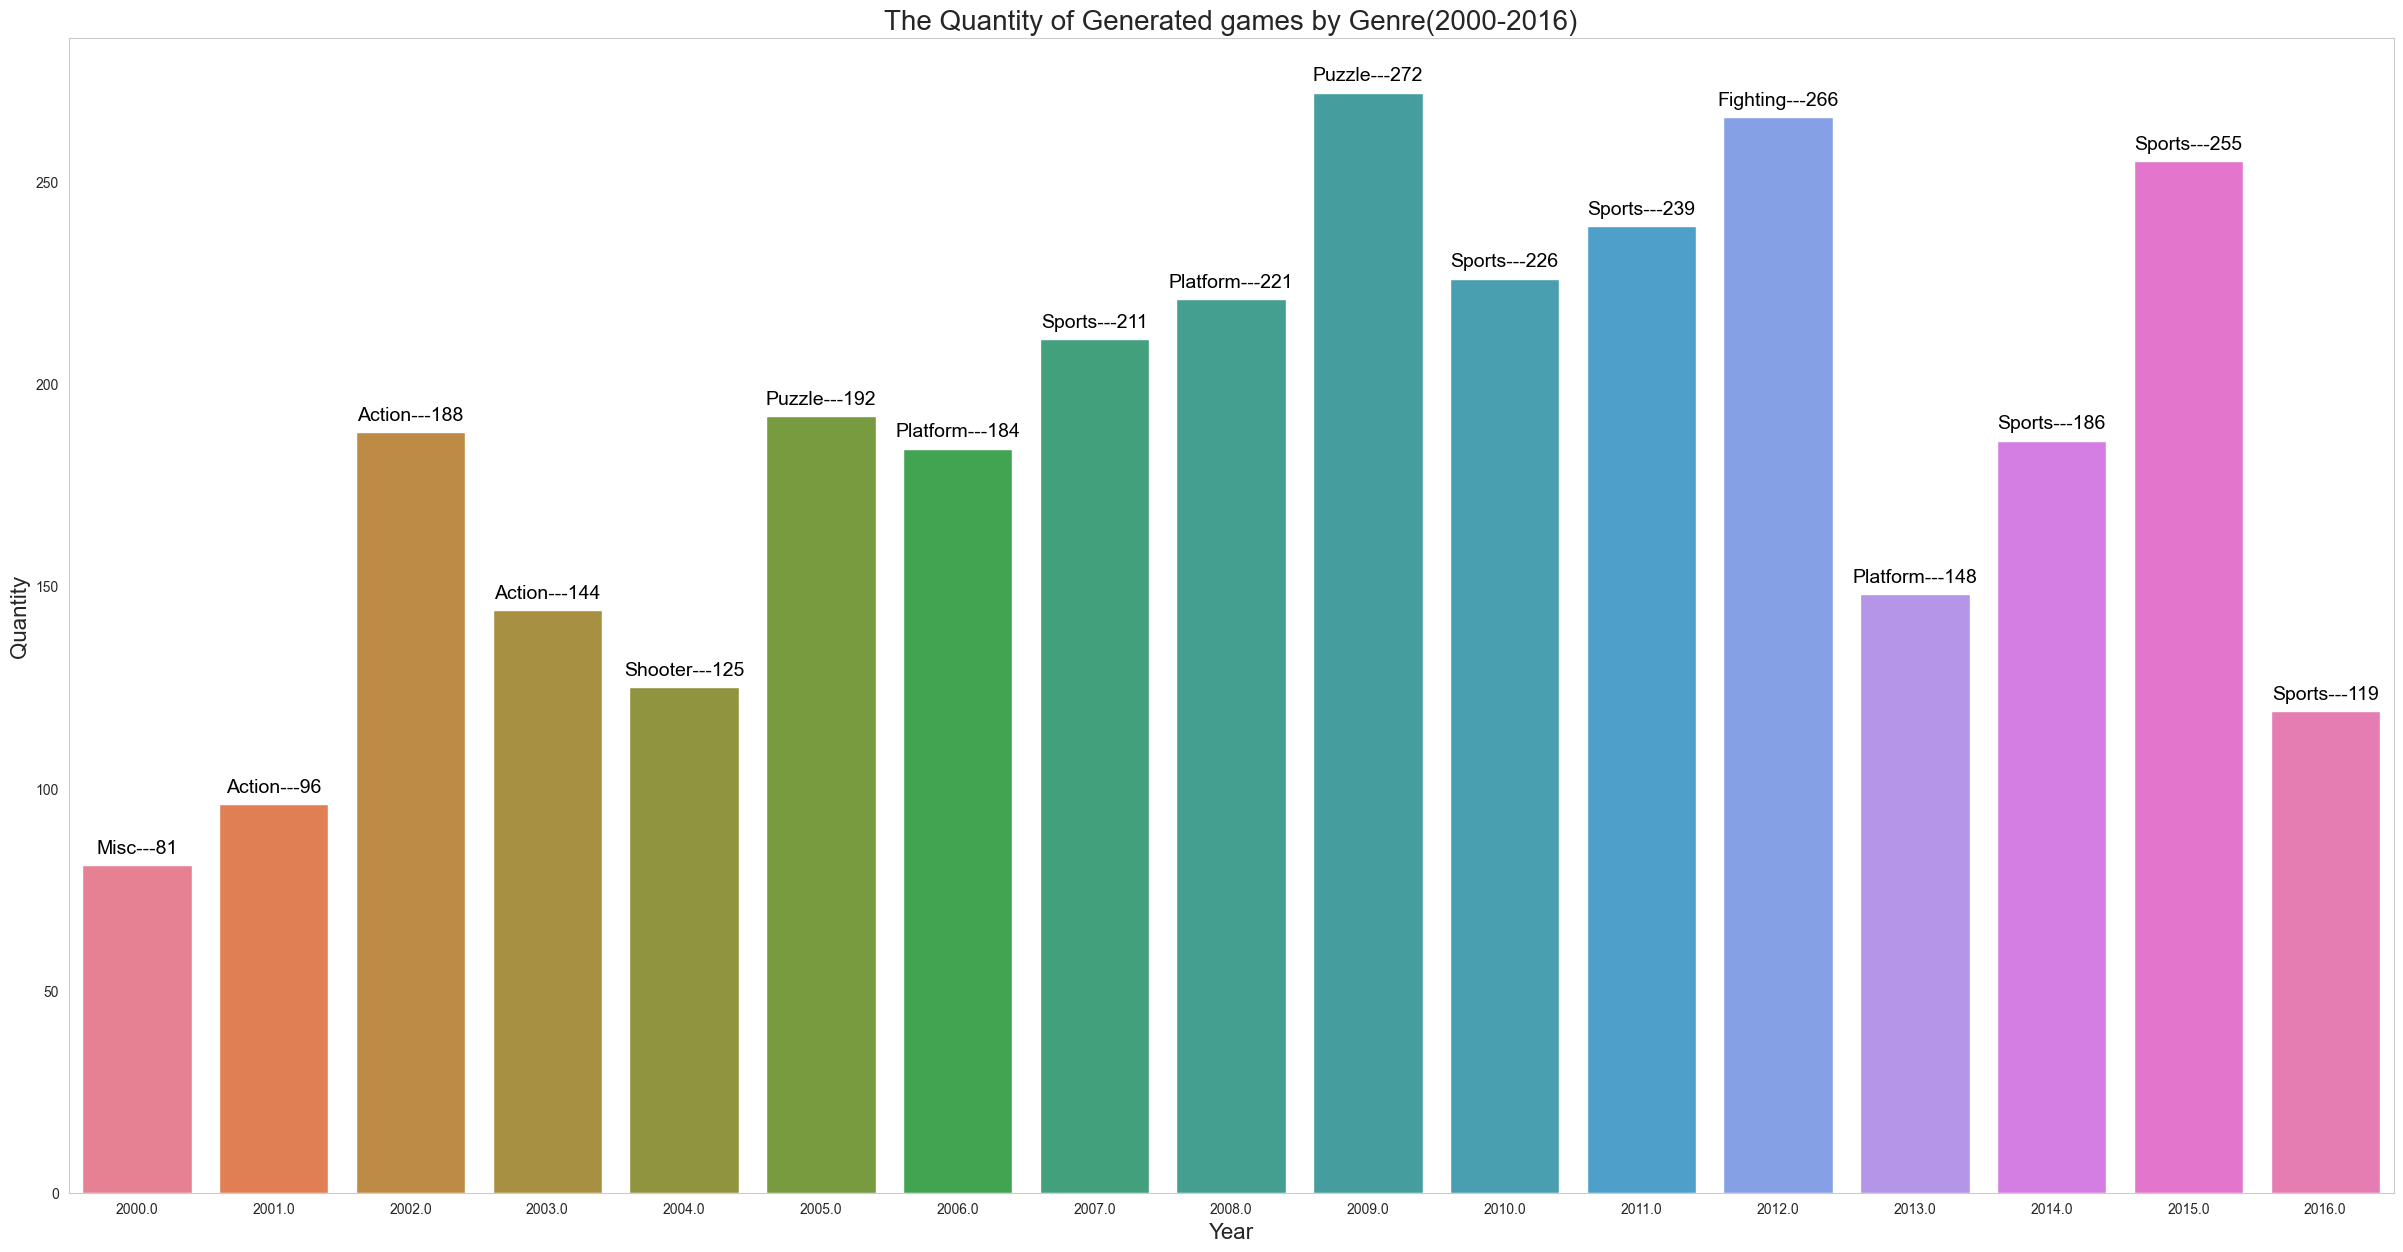

In [105]:
# 연도와 장르별로 데이터를 그룹화,각 조합의 개수를 세어 새로운 데이터프레임 생성
year_max_df = data.groupby(['Year','Genre']).size().reset_index(name="count")
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
# 연도와 개수로 중복된 값을 제거 (최신 장르 유지)
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=['Year','count'],keep='last').reset_index(drop=True)

# 2000~2016년 데이터 필터링
year_max_genre_filtered = year_max_genre[(year_max_genre['Year'] >= 2000)&(year_max_genre['Year'] <=2016)]

# 연도별 고유 색상 생성
unique_years = year_max_genre_filtered['Year'].unique()
colors = sns.color_palette("husl", len(unique_years))

genre = year_max_genre['Genre'].values

plt.figure(figsize=(30, 15))
#선 그래프 생성
g = sns.barplot(x='Year', y='count', data=year_max_genre_filtered,palette=colors)

# 그래프에 텍스트 추가
index = 0
for value in year_max_genre_filtered['count'].values:

    g.text(index, value + 3, str(genre[index] + '---' +str(value)), color='#000', size=14, ha="center")
    index += 1


 

plt.title('The Quantity of Generated games by Genre(2000-2016)',fontsize=20)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Quantity',fontsize=16)
plt.grid(False)



plt.show()